<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None
   age         job  marital  education default  balance housing loan  contact  \
0   59      a

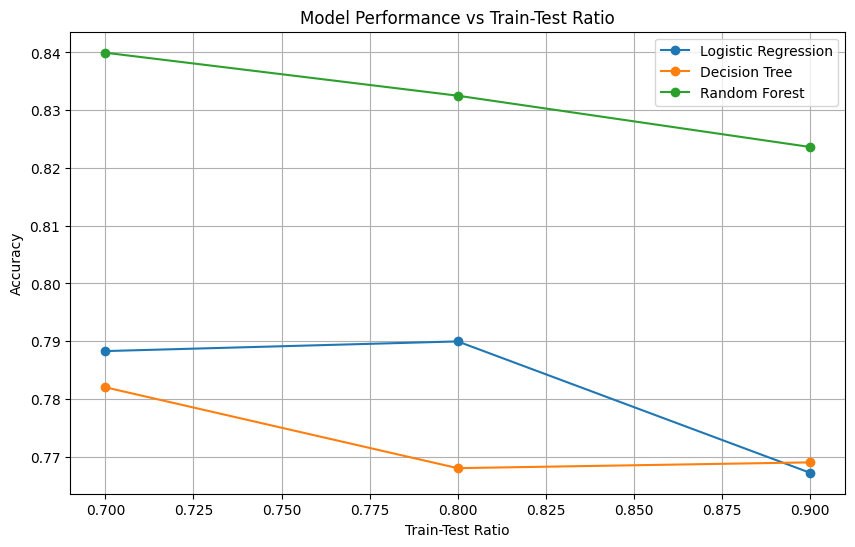

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

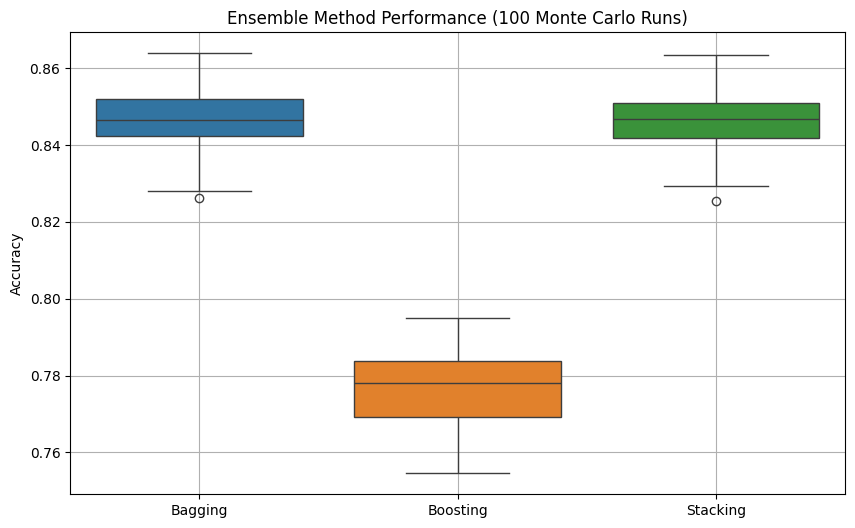

Best Ensemble Method: Bagging
Mean Accuracy: 0.8466


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.metrics import accuracy_score

# Loading dataset
data = pd.read_csv("bank.csv")

print(data.info())
print(data.head())

# Data Preprocessing
data = data.dropna()

# Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Encode the target variable
deposit_encoder = label_encoders['deposit']

# Split features and target
X = data.drop('deposit', axis=1)  
y = data['deposit']  

# Standardizing numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Models 
train_test_ratios = [0.7, 0.8, 0.9]
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# accuracy scores
accuracy_results = {model_name: [] for model_name in models}

for ratio in train_test_ratios:
    for model_name, model in models.items():
       
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_results[model_name].append(accuracy)

# Visualization
plt.figure(figsize=(10, 6))
for model_name, accuracies in accuracy_results.items():
    plt.plot(train_test_ratios, accuracies, marker='o', label=model_name)
plt.title("Model Performance vs Train-Test Ratio")
plt.xlabel("Train-Test Ratio")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Ensemble Methods
ensemble_methods = {
    "Bagging": BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42),
    "Boosting": AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=50, random_state=42),  # Corrected line
    "Stacking": StackingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('dt', DecisionTreeClassifier())
    ], final_estimator=LogisticRegression(), passthrough=True)
}


ensemble_scores = {method: [] for method in ensemble_methods}

# Perform 100 Monte Carlo runs
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=i)
    for method_name, method in ensemble_methods.items():
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        ensemble_scores[method_name].append(accuracy)

# Visualize Ensemble Performance 
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(ensemble_scores))
plt.title("Ensemble Method Performance (100 Monte Carlo Runs)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Best Classifier
best_method = max(ensemble_scores, key=lambda k: np.mean(ensemble_scores[k]))
print(f"Best Ensemble Method: {best_method}")
print(f"Mean Accuracy: {np.mean(ensemble_scores[best_method]):.4f}")
